<a href="https://colab.research.google.com/github/PyBlin/Study/blob/main/AI_Class1/Day20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# IPython 디스플레이 설정 변경 - 출력할 최대 열의 개수
pd.set_option( 'display.max_columns', 20 ) # 출력할 열의 개수 한도
pd.set_option( 'display.max_colwidth', 20 ) # 출력할 열의 너비
pd.set_option( 'display.unicode.east_asian_width', True ) # 유니코드 사용 너비 조정

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount( '/drive' )

Mounted at /drive


# 0. MLP Deep Learning Model - Simple Linear Regression Model

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 1. Prepare Data

In [4]:
dataset_path = keras.utils.get_file('auto-mpg.data', 
                                    'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')
dataset_path

40960/30286 [========================================] - 0s 4us/step


'/root/.keras/datasets/auto-mpg.data'

In [5]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 
                'Acceleration', 'Model Year', 'Origin'] 
raw_ds = pd.read_csv(dataset_path, names=column_names, na_values='?', 
                     comment='\t', sep=' ', skipinitialspace=True)

df = raw_ds.copy()
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


# 2. 데이터 정제

In [6]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
df = df.dropna()
origin = df.pop('Origin')

df['USA'] = (origin == 1) * 1.0
df['EU'] = (origin == 2) * 1.0
df['JPN'] = (origin == 3) * 1.0

df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,EU,JPN
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


# 3. 데이터 분리

In [8]:
train_ds = df.sample(frac=0.8, random_state=42)
test_ds = df.drop(train_ds.index)

# 4. 데이터 이해

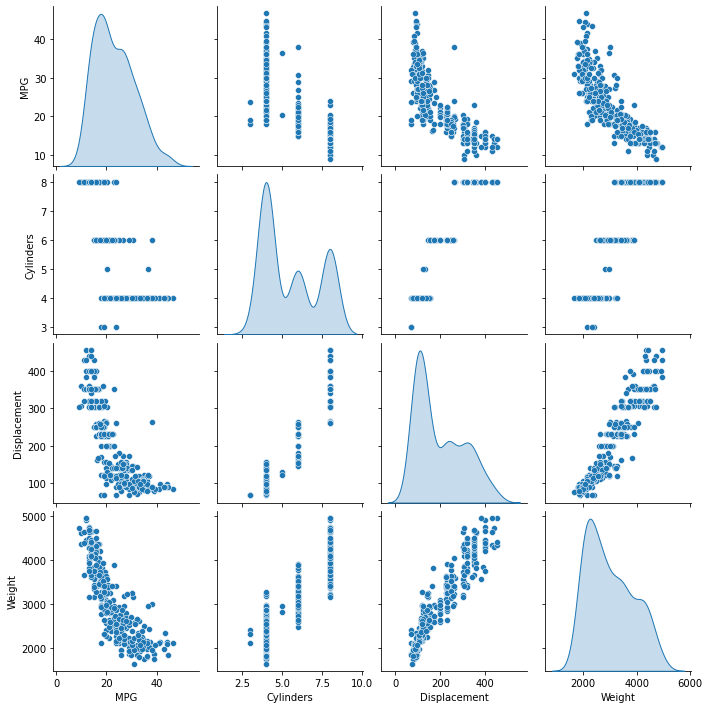

In [9]:
sns.pairplot(train_ds[['MPG', 'Cylinders', 'Displacement', 'Weight']], 
             diag_kind='kde')

In [10]:
train_stats = train_ds.describe()
train_stats.pop('MPG')
train_stats = train_stats.T
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.531847,1.729449,3.0,4.000,4.0,8.00,8.0
Displacement,314.0,197.855096,106.501896,68.0,105.000,151.0,302.00,455.0
Horsepower,314.0,105.971338,39.636557,46.0,76.000,95.0,130.00,230.0
Weight,314.0,3005.745223,859.060925,1649.0,2231.000,2831.5,3641.75,4955.0
Acceleration,314.0,15.510828,2.803560,8.0,13.625,15.5,17.00,24.8
Model Year,314.0,75.910828,3.688989,70.0,73.000,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.000,1.0,1.00,1.0
EU,314.0,0.171975,0.377961,0.0,0.000,0.0,0.00,1.0
JPN,314.0,0.203822,0.403481,0.0,0.000,0.0,0.00,1.0


# 5. 특성과 레이블 분리

In [11]:
train_label = train_ds.pop('MPG')
test_label = test_ds.pop('MPG')

# 6. 데이터 정규화

In [12]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

train_data_norm = norm(train_ds)
test_data_norm = norm(test_ds)

# 7. MLP Modeling

## 7.1 Create Model

In [13]:
def build_model():
    model = keras.Sequential([layers.Dense(64, activation='relu', 
                                           input_shape=[len(train_ds.keys())]), 
                              layers.Dense(64, activation='relu'), 
                              layers.Dense(1)])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    return model

In [14]:
model = build_model()

## 7.2 Check Model

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [16]:
ex_batch = train_data_norm[:10]
ex_result = model.predict(ex_batch)
ex_result

array([[-0.27826184],
       [-0.64731467],
       [-0.3912487 ],
       [-0.21792635],
       [-0.3377241 ],
       [-0.26436126],
       [-0.3476262 ],
       [-0.28078583],
       [-0.03699116],
       [-0.2894038 ]], dtype=float32)

## 7.3 Train Model

In [17]:
# Epoch 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')
EPOCHS = 100

history = model.fit(train_data_norm, train_label, epochs=EPOCHS, 
                    validation_split=0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................

In [18]:
# visualization of training process
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,6.889628,1.833952,6.889628,5.326100,1.740283,5.326100,95
96,6.799905,1.813715,6.799905,5.278855,1.733622,5.278855,96
97,6.894409,1.825651,6.894409,5.356294,1.714131,5.356294,97
98,6.797880,1.843536,6.797880,5.195837,1.710732,5.195837,98
99,6.774534,1.813153,6.774534,5.237985,1.748660,5.237984,99


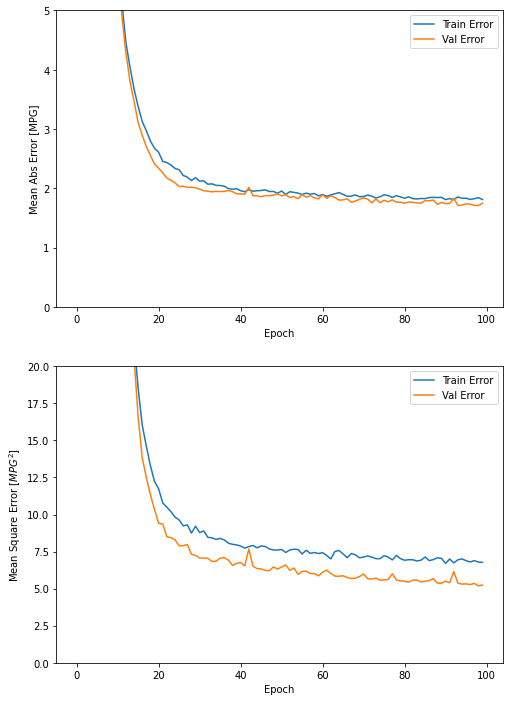

In [19]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8, 12))
    plt.subplot(2, 1, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
    plt.ylim([0, 5])
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
    plt.ylim([0, 20])
    plt.legend()

    plt.show()

plot_history( history )


.........................................................................................

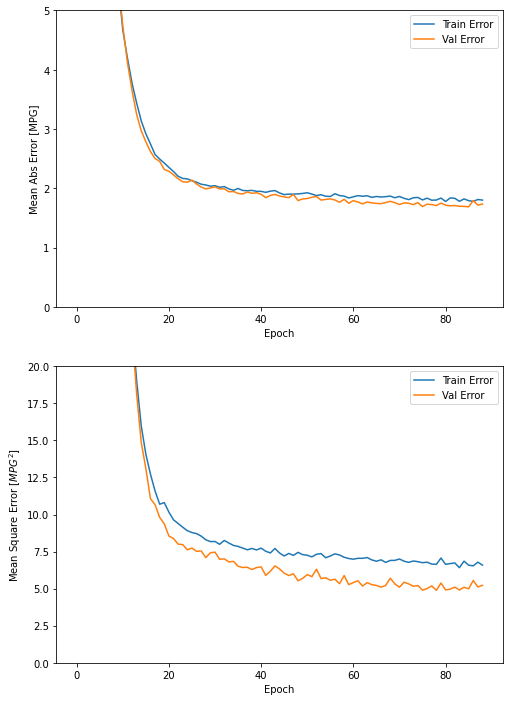

In [20]:
model = build_model()

# 조기 종료
# patience 매개변수는 성능 향상을 체크할 epoch 횟수
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_data_norm, train_label, epochs = EPOCHS, 
                    validation_split=0.2, verbose=0, 
                    callbacks=[early_stop, PrintDot()])
plot_history(history)

In [21]:
loss, mae, mse = model.evaluate(test_data_norm, test_label, verbose=2)
print(f"테스트 세트의 평균 절대 오차 : {mae:.2f} MPG")

3/3 - 0s - loss: 6.7013 - mae: 1.9231 - mse: 6.7013
테스트 세트의 평균 절대 오차 : 1.92 MPG


# 8. Forecast

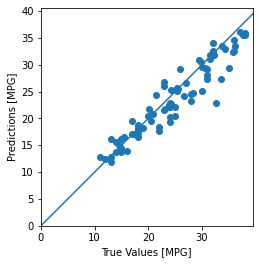

In [22]:
test_predict = model.predict(test_data_norm).flatten()

plt.scatter(test_label, test_predict)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

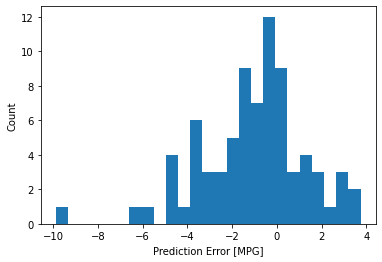

In [23]:
error = test_predict - test_label
plt.hist(error, bins=25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")